In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

In [24]:
start = np.array((0,0,0))
turn_rate = 1.3
speed = 2
r_min = speed / turn_rate
end = np.array((3.1*r_min, 0, np.pi / 2))

<IPython.core.display.Javascript object>


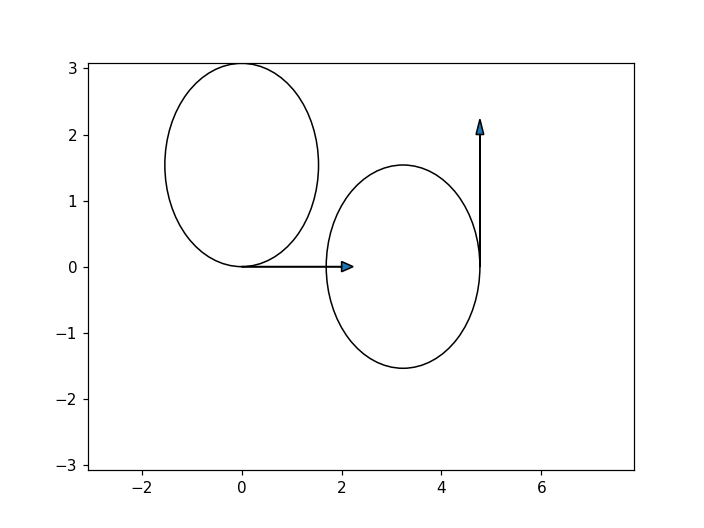

In [69]:
fig1, ax1 = plt.subplots()
ax1.set_xlim(np.min((start[0], end[0])) - 2*r_min,
             np.max((start[0], end[0])) + 2*r_min)
ax1.set_ylim(np.min((start[1], end[1])) - 2*r_min,
             np.max((start[1], end[1])) + 2*r_min)
heading = start[2]
velocity = speed * np.array((np.cos(heading),np.sin(heading)))
ax1.arrow(*start[0:2], *velocity, head_width = r_min / 10)
heading = end[2]
velocity = speed * np.array((np.cos(heading),np.sin(heading)))
ax1.arrow(*end[0:2], *velocity, head_width = r_min / 10)

<IPython.core.display.Javascript object>


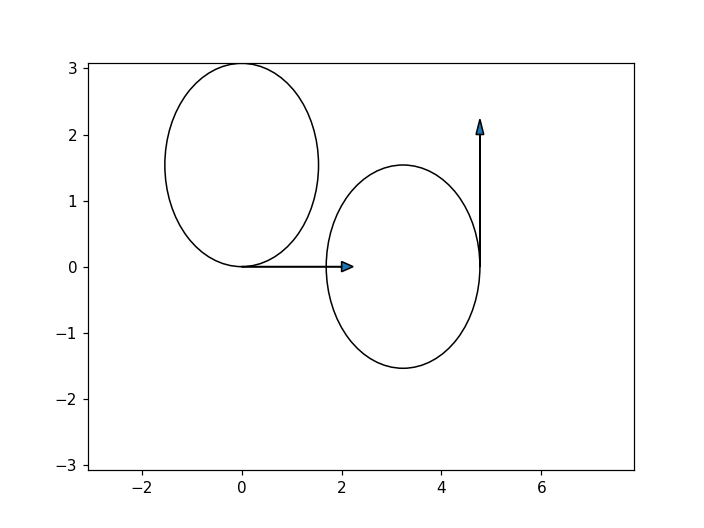

In [70]:
heading = start[2] + np.pi / 2 #take right turn
p1 = start[0:2] + r_min * np.array((np.cos(heading), np.sin(heading)))

heading = end[2] + np.pi / 2
p2 = end[0:2] + r_min * np.array((np.cos(heading), np.sin(heading)))

circle1 = plt.Circle(p1, r_min, fill=False)
circle2 = plt.Circle(p2, r_min, fill=False)


ax1.add_artist(circle1)
ax1.add_artist(circle2)

fig1

<IPython.core.display.Javascript object>


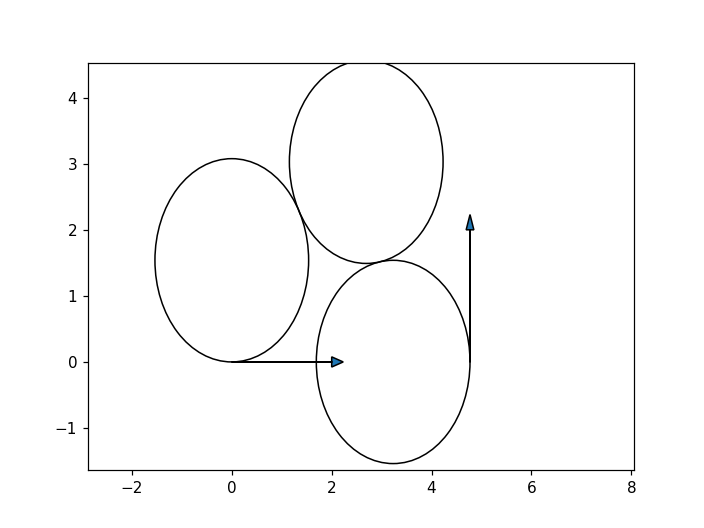

In [71]:
D = np.sqrt(np.sum((p1-p2)**2))
v1 = p2 - p1
theta = np.arctan2(v1[1], v1[0]) + np.arccos(D / (4*r_min))
p3 = np.array((p1[0] + 2*r_min*np.cos(theta), p1[1] + 2*r_min*np.sin(theta)))

circle3 = plt.Circle(p3, r_min, fill=False)

ax1.add_artist(circle3)

fig1

In [58]:
D / (2*r_min)

1.1629703349613008

In [77]:
def turn_n_burn(t, d, theta, v, turn_speed):
    if t <= theta / turn_speed:
        return np.array((0,0, theta - turn_speed * t))
    progress = t - theta/turn_speed
    return np.array((progress*v, 0, 0))

def do_arc(t, d, theta, v, turn_speed):
    r = v / turn_speed
    #print('r', r)
    #print('d', d)
    progress = 2*v*t / r
    to_center = - (np.pi/2 - theta)
    #print(to_center)
    center = np.array((r*np.cos(to_center), r*np.sin(to_center)))
    #print("center", center)
    phi = progress / r
    #print("phi", phi)
    new_angle = np.pi/2 + theta - phi
    #print("new angle", new_angle)
    side_length = np.sqrt((center[0]-d)**2 + (center[1] - 0)**2)
    critical_angle = np.arccos(r/side_length)
    print("critical angle", critical_angle)
    if new_angle <= critical_angle:
        critical_point = center + np.array((r*np.cos(critical_angle), r*np.sin(critical_angle)))
        critical_time = r*critical_angle/v
        new_t = t - critical_time
        #print("new t", new_t)
        heading = -1 * (np.pi/2 - critical_angle)
        #print(heading)
        new_pos = critical_point + v*new_t*np.array((np.cos(heading), np.sin(heading)))
        #print(critical_point)
        #print(v*new_t*np.array(np.cos(heading), np.sin(heading)))
        #print(new_pos)
        return np.append(new_pos, np.nan)
    
    
    new_pos = center + np.array((r*np.cos(new_angle), r*np.sin(new_angle)))
    #print(new_pos)
    return np.append(new_pos, 0)
    
    

In [80]:
d = 4
v = 1.5
theta = np.pi / 3
turn_speed = 1.1

origin = (0,0)
destination = (d,0)

tnb = lambda t: turn_n_burn(t, d, theta, v, turn_speed)
arc = lambda t: do_arc(t, d, theta, v, turn_speed)
arc(1.5)

critical angle 1.08131881928091


array([2.50649465, 0.1570974 ,        nan])

In [74]:
np.pi/2

1.5707963267948966

<IPython.core.display.Javascript object>


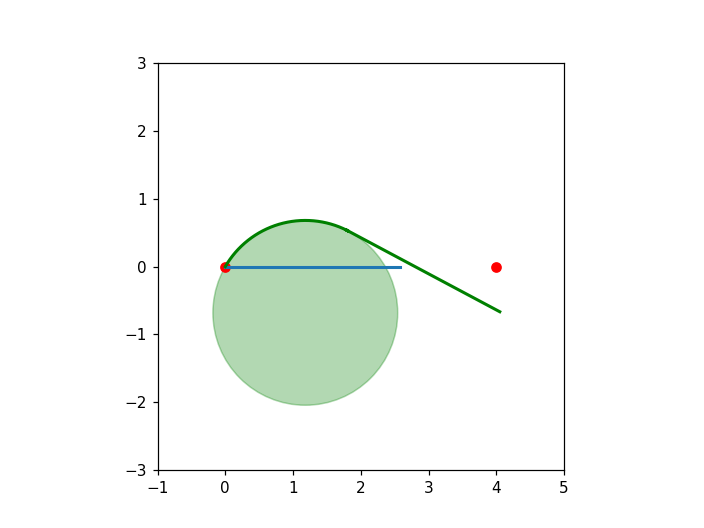

In [75]:
d = 4
v = 1.5
theta = np.pi / 3
turn_speed = 1.1

origin = (0,0)
destination = (d,0)

tnb = lambda t: turn_n_burn(t, d, theta, v, turn_speed)
arc = lambda t: do_arc(t, d, theta, v, turn_speed)

frames = 300
fps = 30
delay = 1000 / fps
timescale = 0.5 / fps

length = d + 2

circle = plt.Circle((1.18094373, -0.68181818), 1.36363, color='green', alpha=0.3)

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-1, d+1), ylim=(-length/2, length/2))
ax.plot(*origin,'ro')
ax.plot(*destination,'ro')
ax.set_aspect("equal")
ax.add_artist(circle)
line, = ax.plot([], [], lw=2)
line2, = ax.plot([], [], 'g', lw=2)
anim_speed = 0

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    line2.set_data([], [])
    return line,line2,

# animation function.  This is called sequentially
def animate(i):
    t = np.linspace(0, i * timescale, 1000)
    pos = np.array(list(map(tnb, t)))
    x = pos[:,0]
    y = pos[:,1]
    line.set_data(x, y)
    
    pos2 = np.array(list(map(arc,t)))
    x2 = pos2[:,0]
    y2 = pos2[:,1]
    line2.set_data(x2, y2)
    return line,line2,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=frames, interval=delay, blit=True, repeat_delay=200)

In [ ]:
x = np.array((0,1))

In [ ]:
np.append(x, 0)

In [ ]:
3